In [1]:
import numpy as np
import tensorly as tl
import scipy.stats as st
import matplotlib.pyplot as plt
from tensorly.decomposition import tucker, parafac, non_negative_tucker

In [2]:
raw = np.load("tenx.npy")

In [3]:
raw.shape

(23, 1000, 1999)

# 2D case

In [4]:
core, factors = tucker(raw.reshape(23000, 1999), rank=[1000, 2])

In [5]:
pfactors = parafac(raw.reshape(23000,1999), 2)

In [6]:
core.shape, [a.shape for a in factors]

((1000, 2), [(23000, 1000), (1999, 2)])

In [7]:
(factors[0]@core).shape

(23000, 2)

In [8]:
PCT = factors[0]@core

In [9]:
PCPF = pfactors[1][0]

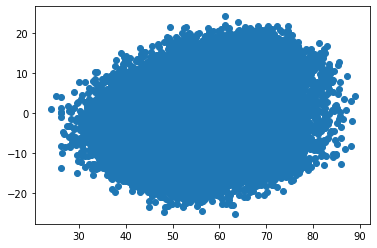

In [10]:
plt.scatter(PCT.T[0], PCT.T[1])

In [11]:
from sklearn.metrics import pairwise_distances

In [12]:
def triu_dists(d):
    triui = np.triu_indices(d.shape[0])    
    return(d[triui])

In [13]:
d_orig = pairwise_distances(raw.reshape(23000, 1999))

In [14]:
d_tucker = pairwise_distances(PCT)

In [15]:
d_orig_flat = triu_dists(d_orig)
d_tucker_flat = triu_dists(d_tucker)

In [16]:
d_orig_flat = d_orig_flat/np.max(d_orig_flat)
d_tucker_flat = d_tucker_flat/np.max(d_tucker_flat)

In [17]:
st.pearsonr(d_orig_flat, d_tucker_flat)

(0.5059874812565299, 0.0)

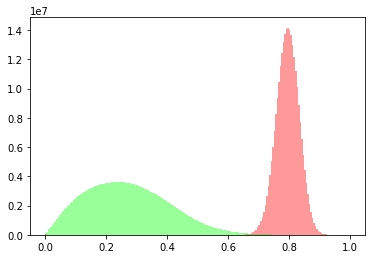

In [40]:
plt.hist(d_orig, color=(1,0,0,0.4), bins=200)
plt.hist(d_tucker, color=(0,1,0,0.4), bins=200)
plt.show()

In [ ]:
def getCliques(known_values):
  adjacency_matrix = known_values.astype(int)
  rows, cols = np.where(adjacency_matrix == 1)
  edges = zip(rows.tolist(), cols.tolist())
  gr = nx.Graph()
  all_rows = range(0, adjacency_matrix.shape[0])
  for n in all_rows:
    gr.add_node(n)

  gr.add_edges_from(edges)


  cliques = list(nx.find_cliques(gr))

  #Look at number of cells in cliques (sizes)
  print(np.unique([len(i) for i in cliques])) 

  print(len(cliques))

  return cliques

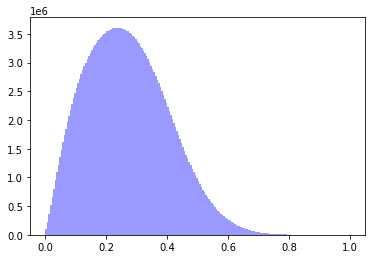

In [36]:
plt.hist(d_parafac, color=(0,0,1,0.4), bins=200)
plt.show()